In [1]:
import matplotlib.pyplot as plt
import plotly as ply
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("./dati_polveri/polveri_emilia_PM10.csv")
df.head()

,02000003_005_202007.csv,COD_STAZ,ID_PARAM,DATA_INIZIO,DATA_FINE,VALORE,UM,Anno,Mese,Giorno,...,Mesenome,Stazione,COMUNE,INDIRIZZO,PROVINCIA,Altezza,PARAMETRO,TipoStazione,TipoArea,Zonizzazione
0,02000003_005_202007.txt,2000003,5,43831,43832,52,ug/m3,2020,1,1,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
1,02000003_005_202007.txt,2000003,5,43832,43833,59,ug/m3,2020,1,2,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
2,02000003_005_202007.txt,2000003,5,43833,43834,45,ug/m3,2020,1,3,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
3,02000003_005_202007.txt,2000003,5,43834,43835,42,ug/m3,2020,1,4,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest
4,02000003_005_202007.txt,2000003,5,43835,43836,31,ug/m3,2020,1,5,...,gennaio,CITTADELLA,PARMA,PARCO CITTADELLA,PR,60.0,PM10,Fondo,Urbano,Pianura Ovest


In [3]:
def string_date(anno,mese,giorno):
    return str(anno)+"-"+str(mese).zfill(2)+"-"+str(giorno).zfill(2)

In [4]:
#res = df[(df['Stazione']=='MARECCHIA')]
res = df[df['Anno'] == 2018].copy()
aux_df = res[['Anno','Mese', 'Giorno', 'Stazione', 'VALORE']].copy()
aux_df['VALORE'].replace(to_replace=0, value=1, inplace=True)
lista_date = aux_df.apply(lambda vec : string_date(vec[0],vec[1],vec[2]),axis=1).tolist()
lista_log = aux_df.apply(lambda vec : np.log(vec[4]),axis=1).tolist()

final_df = res[['Stazione','VALORE','TipoStazione','TipoArea','Zonizzazione','Altezza','Mese']].copy()
final_df['Date'] = lista_date
final_df['LogVal'] = lista_log

final_df['Mese'].replace(to_replace=1, value='Gennaio', inplace=True)
final_df['Mese'].replace(to_replace=2, value='Febbraio', inplace=True)
final_df['Mese'].replace(to_replace=3, value='Marzo', inplace=True)
final_df['Mese'].replace(to_replace=4, value='Aprile', inplace=True)
final_df['Mese'].replace(to_replace=5, value='Maggio', inplace=True)
final_df['Mese'].replace(to_replace=6, value='Giugno', inplace=True)
final_df['Mese'].replace(to_replace=7, value='Luglio', inplace=True)
final_df['Mese'].replace(to_replace=8, value='Agosto', inplace=True)
final_df['Mese'].replace(to_replace=9, value='Settembre', inplace=True)
final_df['Mese'].replace(to_replace=10, value='Ottobre', inplace=True)
final_df['Mese'].replace(to_replace=11, value='Novembre', inplace=True)
final_df['Mese'].replace(to_replace=12, value='Dicembre', inplace=True)


final_df = final_df.sort_values(by=['Stazione','Date'])
final_df.head()

,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal
75727,BADIA,39,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-01,3.663562
75728,BADIA,13,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-02,2.564949
75729,BADIA,12,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-03,2.484907
75730,BADIA,15,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-04,2.708050
75731,BADIA,34,Fondo,Rurale,Pianura Ovest,202.0,Gennaio,2018-01-05,3.526361


In [5]:
sns.set_theme(style="ticks")

print(len(final_df['Stazione'].drop_duplicates().tolist()))
palette = sns.color_palette("YlOrRd",n_colors=len(final_df['Stazione'].drop_duplicates().tolist()))



49


<AxesSubplot: xlabel='LogVal', ylabel='Percent'>

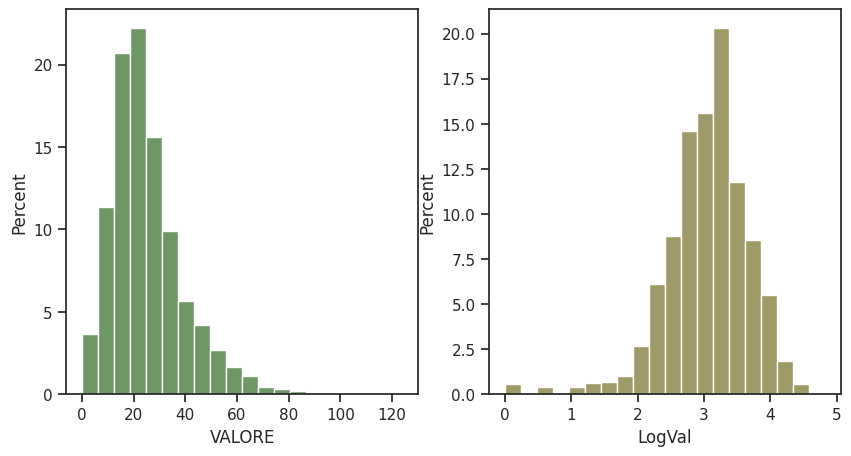

In [6]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
sns.histplot(data=final_df['VALORE'], stat='percent', bins=20, color=sns.color_palette("cubehelix",10)[3])

ax = fig.add_subplot(1,2,2)
sns.histplot(data=final_df['LogVal'], stat='percent', bins=20, color=sns.color_palette("cubehelix",10)[4])


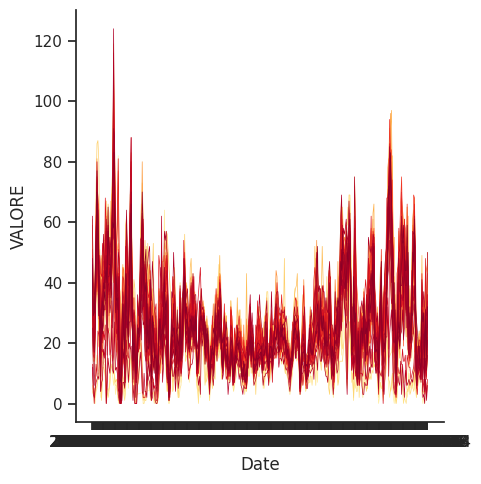

In [7]:
g = sns.relplot(
    data=final_df,
    x="Date", y="VALORE",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)
g._legend.remove()

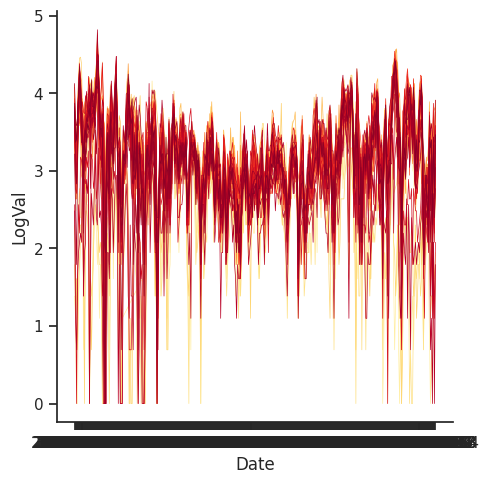

In [8]:

g = sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="Stazione",palette=palette,linewidth=0.5
)
g._legend.remove()

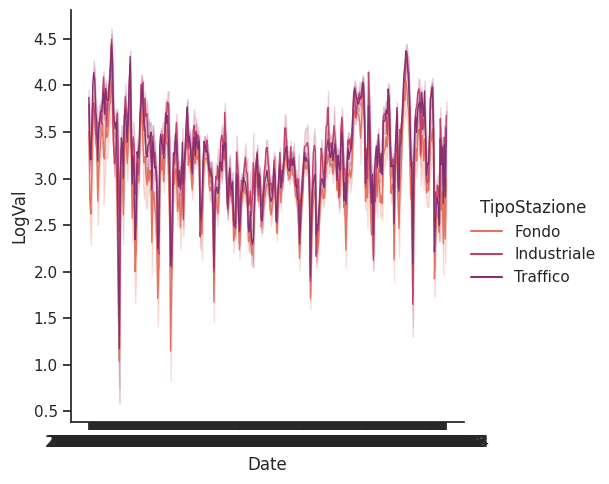

In [9]:
sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="TipoStazione",palette=sns.color_palette("flare",n_colors=3),linewidth=1
)

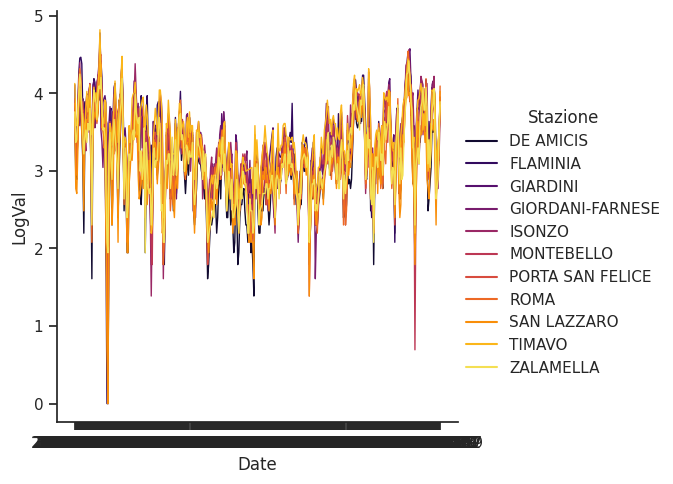

In [10]:
g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Traffico'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=11)
)

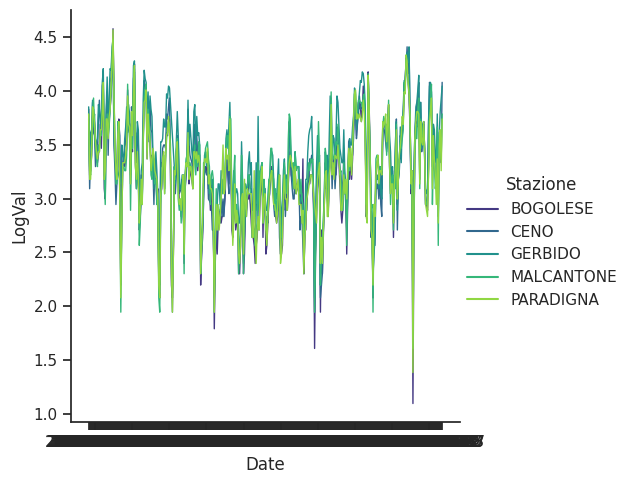

In [11]:
g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Industriale'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("viridis",n_colors=5)
)

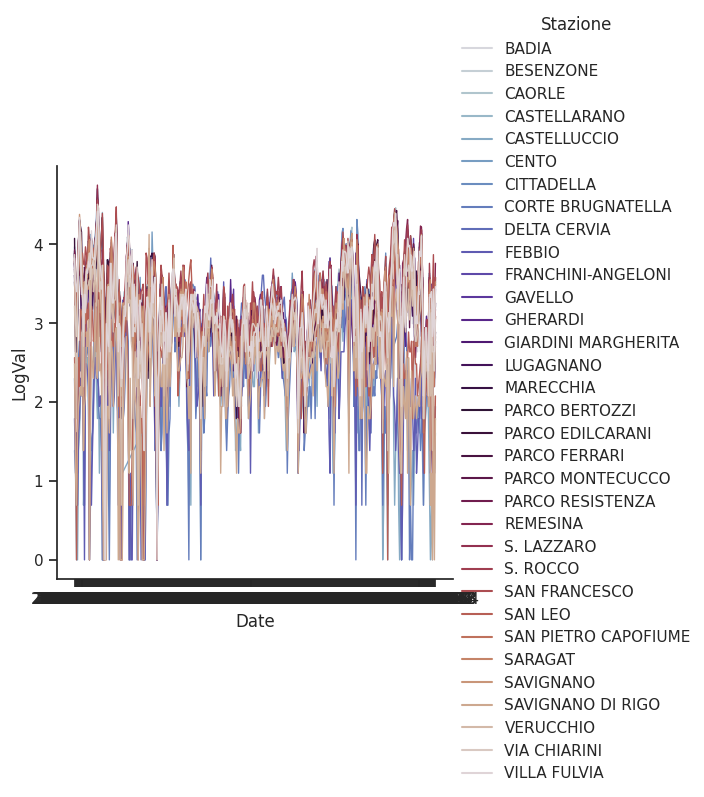

In [12]:
g = sns.relplot(
    data=final_df[final_df['TipoStazione'] == 'Fondo'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("twilight",n_colors=33)
)

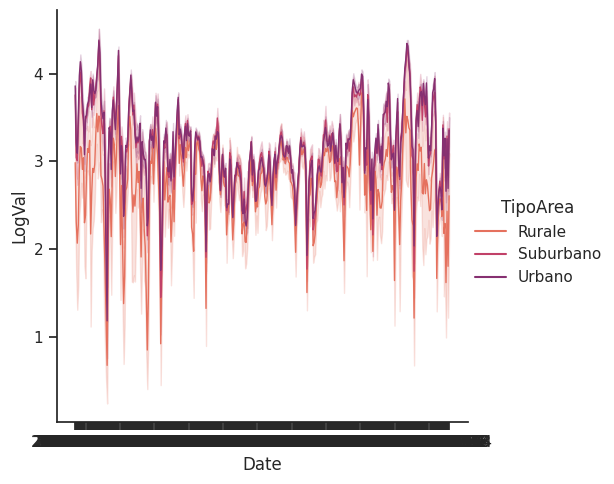

In [13]:
sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="TipoArea",palette=sns.color_palette("flare",n_colors=3),linewidth=1
)

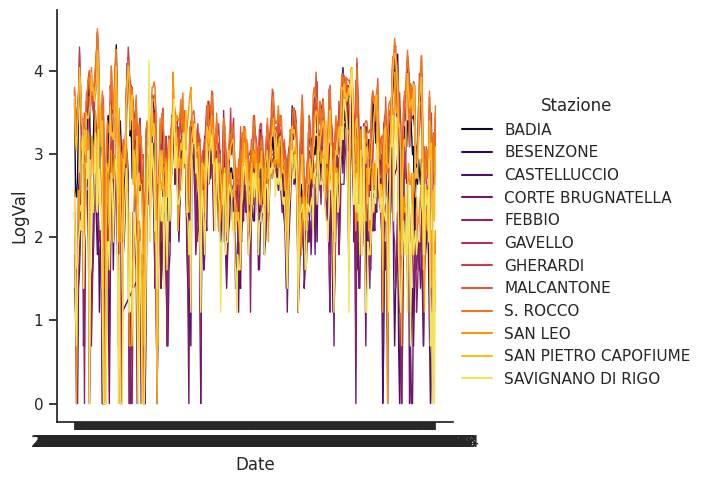

In [14]:
g = sns.relplot(
    data=final_df[final_df['TipoArea'] == 'Rurale'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=12)
)

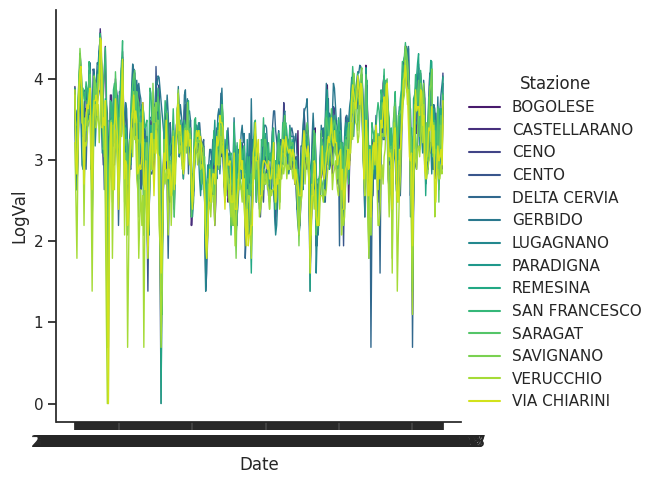

In [15]:
g = sns.relplot(
    data=final_df[final_df['TipoArea'] == 'Suburbano'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("viridis",n_colors=14)
)

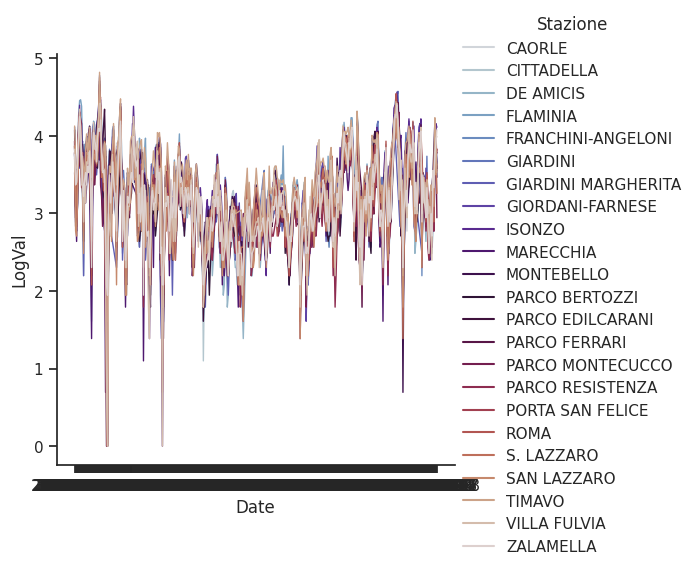

In [16]:
g = sns.relplot(
    data=final_df[final_df['TipoArea'] == 'Urbano'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("twilight",n_colors=23)
)

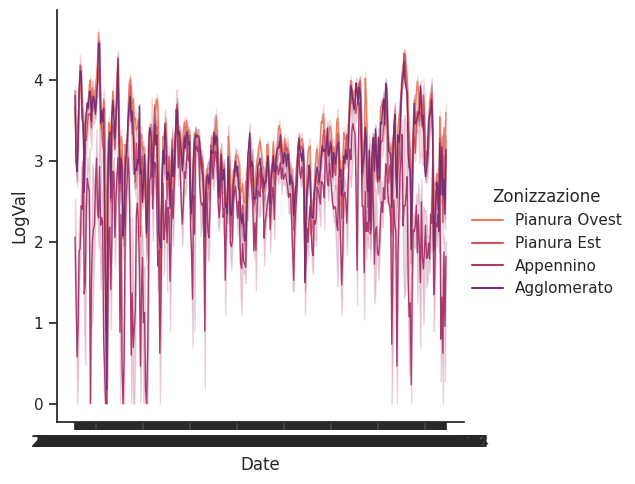

In [17]:
sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind="line",hue="Zonizzazione",palette=sns.color_palette("flare",n_colors=4),linewidth=1
)

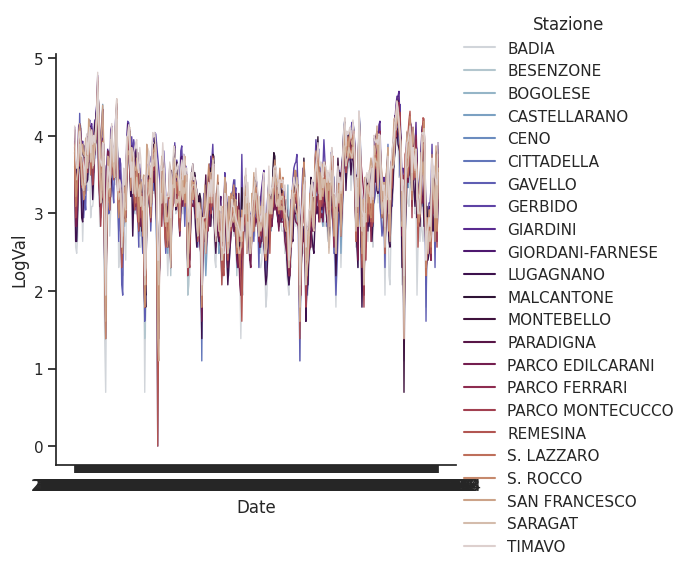

In [18]:
g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Pianura Ovest'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("twilight",n_colors=23)
)

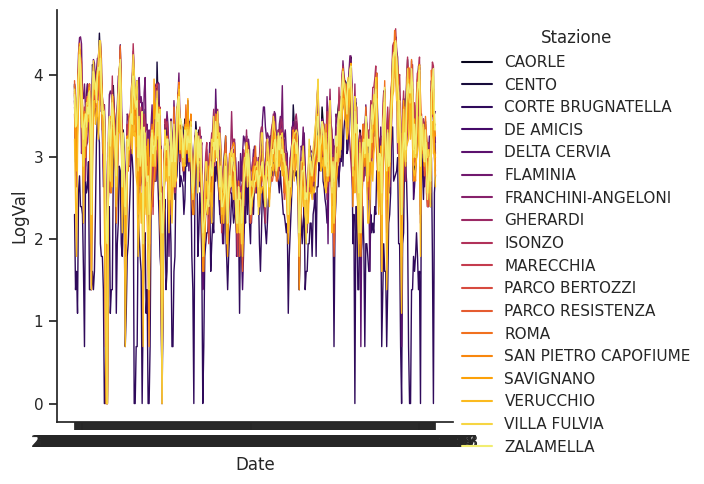

In [19]:
g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Pianura Est'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=18)
)

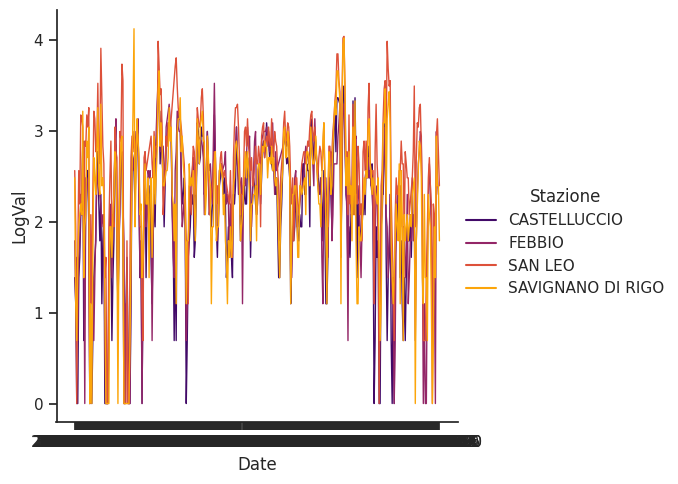

In [20]:
g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Appennino'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=4)
)

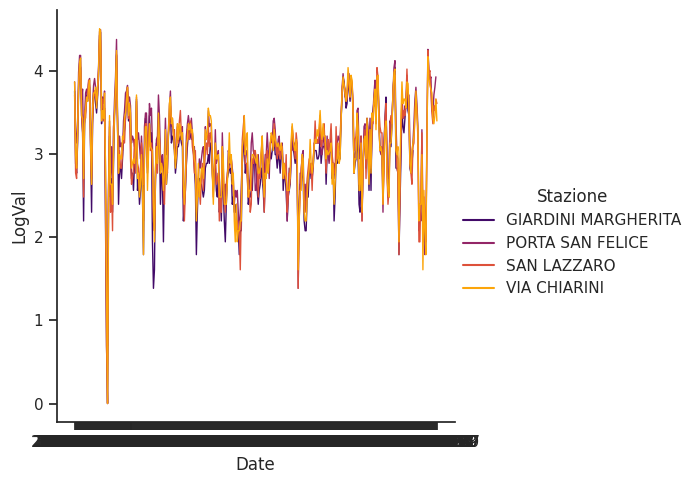

In [21]:
g = sns.relplot(
    data=final_df[final_df['Zonizzazione'] == 'Agglomerato'],
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Stazione',palette=sns.color_palette("inferno",n_colors=4)
)

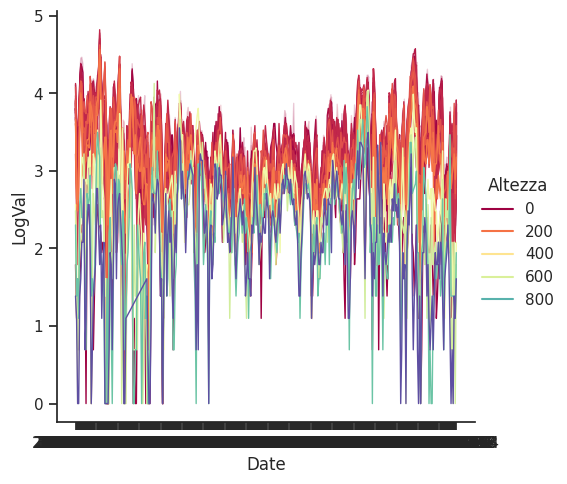

In [22]:
g = sns.relplot(
    data=final_df,
    x="Date", y="LogVal",
    kind='line',linewidth=1,hue='Altezza',palette=sns.color_palette("Spectral",as_cmap=True)
)

In [23]:
ru = datetime.date.fromisocalendar(2018,51,1)
print(ru)
rd = datetime.date.fromisocalendar(2018,52,1)
print(rd)
final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]

2018-12-17
2018-12-24


,Stazione,VALORE,TipoStazione,TipoArea,Zonizzazione,Altezza,Mese,Date,LogVal
76063,BADIA,30,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-17,3.401197
76064,BADIA,22,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-18,3.091042
76065,BADIA,37,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-19,3.610918
76066,BADIA,26,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-20,3.258097
76067,BADIA,20,Fondo,Rurale,Pianura Ovest,202.0,Dicembre,2018-12-21,2.995732
...,...,...,...,...,...,...,...,...,...
89806,ZALAMELLA,49,Traffico,Urbano,Pianura Est,4.0,Dicembre,2018-12-19,3.891820
89807,ZALAMELLA,44,Traffico,Urbano,Pianura Est,4.0,Dicembre,2018-12-20,3.784190
89808,ZALAMELLA,44,Traffico,Urbano,Pianura Est,4.0,Dicembre,2018-12-21,3.784190
89809,ZALAMELLA,59,Traffico,Urbano,Pianura Est,4.0,Dicembre,2018-12-22,4.077537


In [24]:
vec_mean_val = np.zeros(52)
vec_mean_log_val = np.zeros(52)
vec_std_val = np.zeros(52)
vec_std_log_val = np.zeros(52)
vec_var_val = np.zeros(52)
vec_var_log_val = np.zeros(52)

for i in range(51):
    ru = datetime.date.fromisocalendar(2018,i+1,1)
    rd = datetime.date.fromisocalendar(2018,i+2,1)
    aux_df = final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]    
    vec_mean_val[i] = np.mean(aux_df['VALORE'].to_numpy())
    vec_mean_log_val[i] = np.mean(aux_df['LogVal'].to_numpy())
    vec_std_val[i] = np.std(aux_df['VALORE'].to_numpy(),ddof=1)
    vec_std_log_val[i] = np.std(aux_df['LogVal'].to_numpy(),ddof=1)
    vec_var_val[i] = np.var(aux_df['VALORE'].to_numpy(),ddof=1)
    vec_var_log_val[i] = np.var(aux_df['LogVal'].to_numpy(),ddof=1)
    
    
ru = datetime.date.fromisocalendar(2018,52,1)
rd = datetime.date.fromisocalendar(2018,52,7)
aux_df = final_df[(final_df['Date'] >= str(ru)) & (final_df['Date'] < str(rd))]
vec_mean_val[51] = np.mean(aux_df['VALORE'].to_numpy())
vec_mean_log_val[51] = np.mean(aux_df['LogVal'].to_numpy())
vec_std_val[51] = np.std(aux_df['VALORE'].to_numpy(),ddof=1)
vec_std_log_val[51] = np.std(aux_df['LogVal'].to_numpy(),ddof=1)
vec_var_val[51] = np.var(aux_df['VALORE'].to_numpy(),ddof=1)
vec_var_log_val[51] = np.var(aux_df['LogVal'].to_numpy(),ddof=1)


d = {'week' : np.arange(1,53,1).tolist(),
    'mean_val' : vec_mean_val.tolist(), 
    'mean_log_val' : vec_mean_log_val.tolist(),
    'std_val' : vec_std_val.tolist(),
    'std_log_val' : vec_std_log_val.tolist(),
    'var_val' : vec_var_val.tolist(),
    'var_log_val' : vec_var_log_val.tolist()}

week_stats_df = pd.DataFrame(data = d)

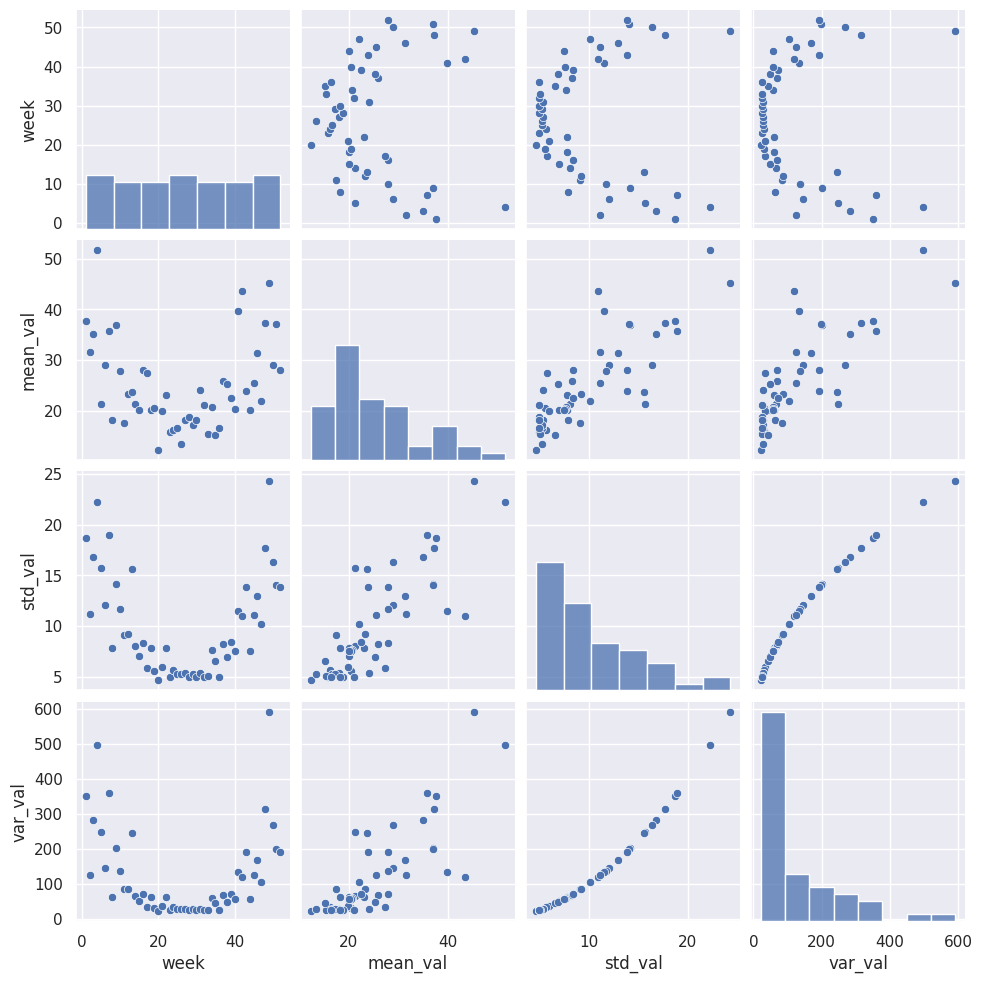

In [25]:
sns.set_theme()
sns.pairplot(week_stats_df[['week','mean_val','std_val','var_val']])

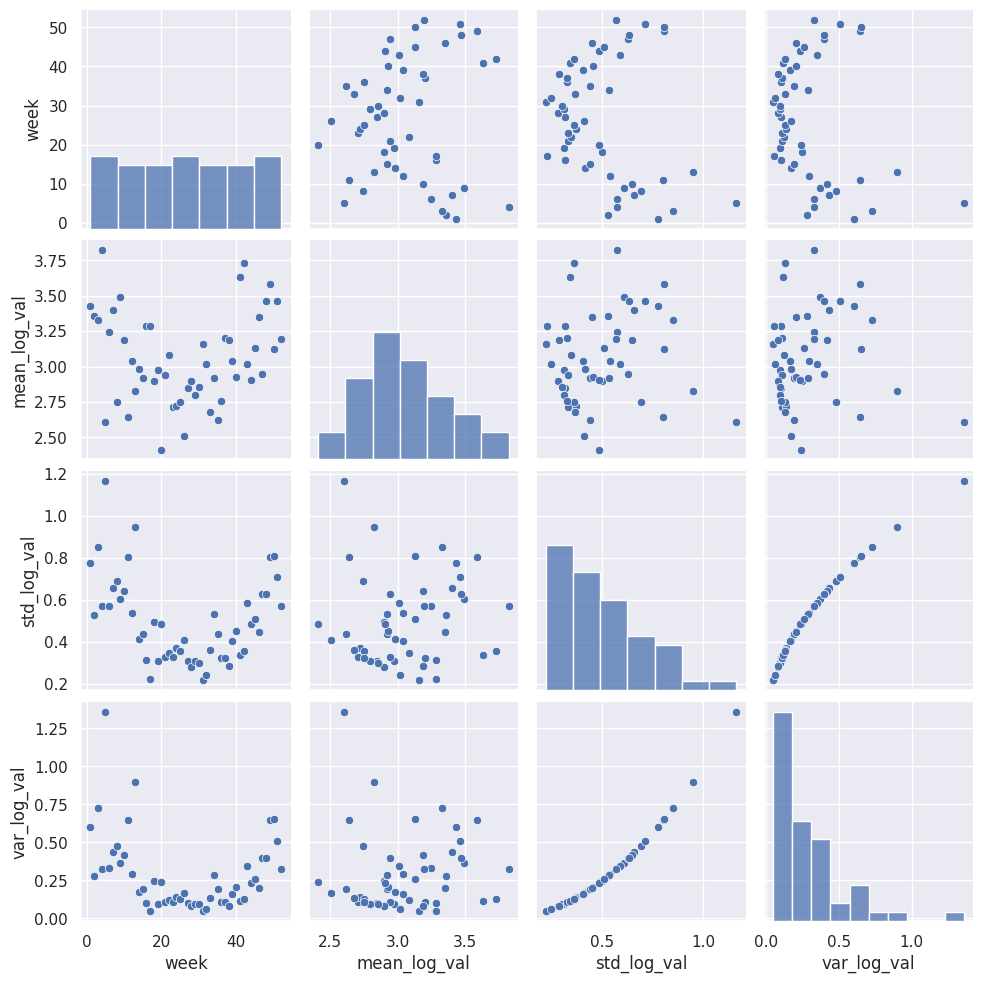

In [26]:
sns.pairplot(week_stats_df[['week','mean_log_val','std_log_val','var_log_val']])

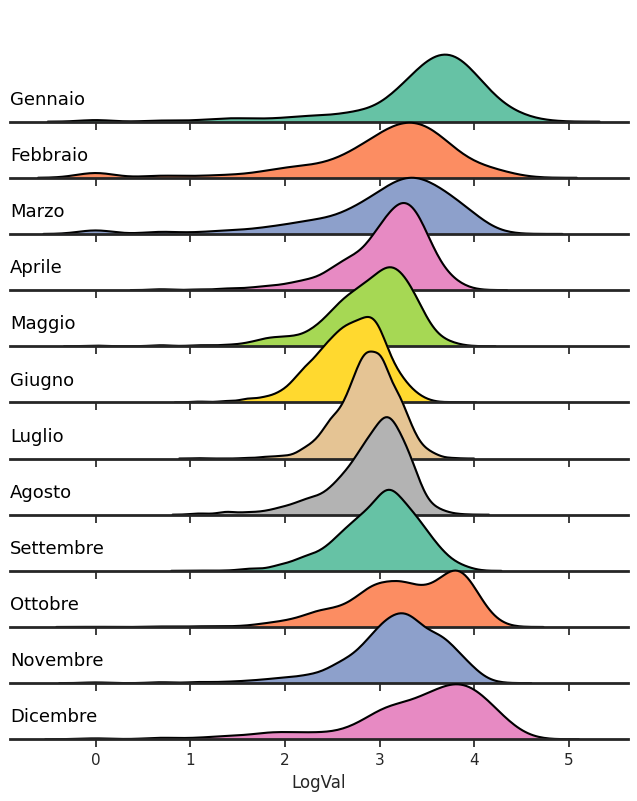

In [27]:

import warnings
warnings.filterwarnings('ignore')


# Theme
sns.set_theme(style="ticks",rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

# create a grid with a row for each 'Language'
g = sns.FacetGrid(final_df, palette=palette, row="Mese", hue="Mese", aspect=10, height=0.7)

# map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="LogVal", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="LogVal", color='black')

# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "Mese")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="LogVal",ylabel="")
# remove left spine
g.despine(left=True)


